<a href="https://colab.research.google.com/github/truechu/AI/blob/main/HW1/URQUHART_WATERJUGPUZZLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Christian Urquhart
>CSC 362
>>12 Sept 2025
>>>Assignment 1 Water Jug Puzzle

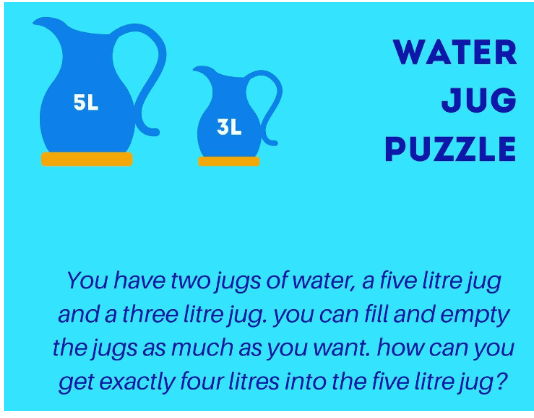

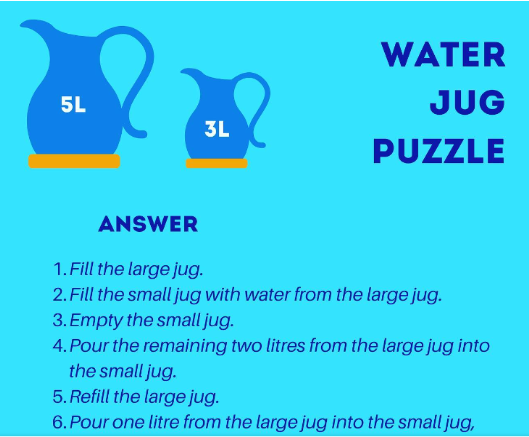

In [5]:

class WaterJugPuzzle:
    """
    A class to model the Water Jug Puzzle:
    - 5-liter jug (jug5)
    - 3-liter jug (jug3)
    Goal: Measure exactly 4 liters in jug5.
    """

    def __init__(self):
        # State: (amount in 5-liter jug, amount in 3-liter jug)
        self.jug5 = 0
        self.jug3 = 0

    def save_state(self):
        """Save state for undo functionality."""
        self._jug5 = self.jug5
        self._jug3 = self.jug3

    def undo_state(self):
        """Undo to previous state if the move is invalid."""
        self.jug5 = self._jug5
        self.jug3 = self._jug3

    def print_state(self):
        """Prints the current state of both jugs."""
        print(f"5L jug: {self.jug5}L, 3L jug: {self.jug3}L")

    ################################################################
    # Rule 1: Fill the 5-liter jug
    ################################################################
    def R1_fill_jug5(self):
        self.save_state()
        self.jug5 = 5

    ################################################################
    # Rule 2: Fill the 3-liter jug
    ################################################################
    def R2_fill_jug3(self):
        self.save_state()
        self.jug3 = 3

    ################################################################
    # Rule 3: Empty the 5-liter jug
    ################################################################
    def R3_empty_jug5(self):
        self.save_state()
        self.jug5 = 0

    ################################################################
    # Rule 4: Empty the 3-liter jug
    ################################################################
    def R4_empty_jug3(self):
        self.save_state()
        self.jug3 = 0

    ################################################################
    # Rule 5: Pour water from 5L jug into 3L jug
    ################################################################
    def R5_pour_5_to_3(self):
        self.save_state()
        space_in_jug3 = 3 - self.jug3
        transfer = min(self.jug5, space_in_jug3)
        self.jug5 -= transfer
        self.jug3 += transfer

    ################################################################
    # Rule 6: Pour water from 3L jug into 5L jug
    ################################################################
    def R6_pour_3_to_5(self):
        self.save_state()
        space_in_jug5 = 5 - self.jug5
        transfer = min(self.jug3, space_in_jug5)
        self.jug3 -= transfer
        self.jug5 += transfer


# ----------------------------
# Main Solution
# ----------------------------
if __name__ == "__main__":
    puzzle = WaterJugPuzzle()

    print("Initial State:")
    puzzle.print_state()
    print("-----------------------")

    # Step 1: Fill the 5L jug
    puzzle.R1_fill_jug5()
    puzzle.print_state()

    # Step 2: Pour from 5L into 3L
    puzzle.R5_pour_5_to_3()
    puzzle.print_state()

    # Step 3: Empty the 3L jug
    puzzle.R4_empty_jug3()
    puzzle.print_state()

    # Step 4: Pour remaining 2L from 5L into 3L
    puzzle.R5_pour_5_to_3()
    puzzle.print_state()

    # Step 5: Fill the 5L jug again
    puzzle.R1_fill_jug5()
    puzzle.print_state()

    # Step 6: Pour from 5L into 3L until full (leaving 4L in jug5)
    puzzle.R5_pour_5_to_3()
    puzzle.print_state()

    print("(The 5L jug contains exactly 4 liters)")


Initial State:
5L jug: 0L, 3L jug: 0L
-----------------------
5L jug: 5L, 3L jug: 0L
5L jug: 2L, 3L jug: 3L
5L jug: 2L, 3L jug: 0L
5L jug: 0L, 3L jug: 2L
5L jug: 5L, 3L jug: 2L
5L jug: 4L, 3L jug: 3L
(The 5L jug contains exactly 4 liters)


Conclusion:
* The 5L Jug contains exactly 4 liters of water.